#**Youtube Video Analysis**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import scale
import plotly.express as px
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
#Reading the actual data
df = pd.read_excel(r"C:\Users\KARISHMA\Desktop\project6thsem\project\train.xlsx")

In [3]:
#displaying first 5 rows
df.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,0,0,13342,6089,0.0,1978978.0,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,1,0,5761,3044,0.0,1487870.0,NaN,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO â–¶ \n\nSUBSCRIBE â–º ...,10.0,22,3,257850,1,1,0,0,1.0,1502102.0,NaN,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,1,1,0,0,1.0,3519302.0,NaN,NaN
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,1,1,0,0,1.0,4835374.0,NaN,NaN


In [5]:
df.describe()

,subscriber,Trend_day_count,comment_disabled,like dislike disabled,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
count,3.175000e+03,3197.000000,3198.000000,3198.000000,3198.000000,3197.000000,3.197000e+03,1.0,1.0
mean,3.823981e+06,7.964342,0.690119,0.264853,5782.877423,0.659368,1.572121e+06,2544.0,0.0
std,2.865771e+07,78.556055,0.633717,0.445556,4861.070612,0.473996,2.053853e+07,NaN,NaN
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,2544.0,0.0
25%,2.428800e+05,4.000000,0.000000,0.000000,0.000000,0.000000,4.305820e+05,2544.0,0.0
50%,1.241220e+06,7.000000,1.000000,0.000000,5351.500000,1.000000,7.081770e+05,2544.0,0.0
75%,3.812622e+06,10.000000,1.000000,1.000000,10040.250000,1.000000,1.204461e+06,2544.0,0.0
max,1.576229e+09,4444.000000,25.000000,4.000000,14858.000000,1.000000,9.898735e+08,2544.0,0.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3198 non-null   object 
 1   category_id            3192 non-null   object 
 2   channel_title          3195 non-null   object 
 3   subscriber             3175 non-null   float64
 4   title                  3195 non-null   object 
 5   tags                   3046 non-null   object 
 6   description            3133 non-null   object 
 7   Trend_day_count        3197 non-null   float64
 8   Tag_count              3197 non-null   object 
 9   Trend_tag_count        3197 non-null   object 
 10  comment_count          3198 non-null   object 
 11  comment_disabled       3198 non-null   int64  
 12  like dislike disabled  3198 non-null   int64  
 13  likes                  3198 non-null   object 
 14  dislike                3198 non-null   int64  
 15  tag 

<br>

Let's check the no.of records for a random video: Iot0eF6EoNA

In [34]:
df.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,0,0,13342,6089,0.0,1978978.0,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,1,0,5761,3044,0.0,1487870.0,NaN,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO â–¶ \n\nSUBSCRIBE â–º ...,10.0,22,3,257850,1,1,0,0,1.0,1502102.0,NaN,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,1,1,0,0,1.0,3519302.0,NaN,NaN
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,1,1,0,0,1.0,4835374.0,NaN,NaN


In [38]:
df[df.Video_id=="HDR9SQc79"]

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,0,0,13342,6089,0.0,1978978.0,NaN,NaN


Details inferred:

1. Same video can be there multiple times in dataset as the video can stay in trending for many consecutive days.
2. View Count,Likes and Dislikes Change as the time prolongs. So we shouldn't do group by on a Video_Id and add all the view_Counts,Likes,Dislikes as those will be repeated.

In [40]:
df.Video_id.nunique()

3198

Though there are 152593: entries, no.of unique videos are: 46294

In [42]:
df.channel_title.nunique()

1501

In [46]:
df_maxViews = df.sort_values('views', ascending=False).drop_duplicates(['Video_id'])
df_maxViews.sample(5)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
1964,ZLQ39BLK62,23,The Tonight Show Starring Jimmy Fallon,15769455.0,Anderson Cooper and Andy Cohen Met on a Failed...,The Tonight Show|Jimmy Fallon|Anderson Cooper|...,Anderson Cooper and Andy Cohen chat with Jimmy...,4.0,8,3,109107,1,0,12463,12115,1.0,3487257.0,NaN,NaN
126,RZY9SHO32,10,2CELLOS,3073400.0,2CELLOS - Cinema Paradiso [OFFICIAL VIDEO],2CELLOS|Luka Sulic|Stjepan Hauser|cello|cellis...,Get â€œCinema Paradisoâ€ from our album â€œSc...,5.0,18,7,58861,1,0,17522,14315,1.0,868719.0,NaN,NaN
1899,SPF43FWC55,25,Al Jazeera English,1957681.0,Trump threatens to cut aid over UN Jerusalem vote,youtube|united nations|aljazeera|aljazeera eng...,US President Donald Trump has threatened to cu...,2.0,13,2,148576,1,1,0,0,1.0,734141.0,NaN,NaN
994,FFH75IEo8,22,HiHo Kids,1050076.0,Kids Describe A Perfect World to Koji the Illu...,HihoKids|hiho|HiHoKids|Hiho|kids|forkids|kidsv...,Send HiHo kids things to unbox: \nPO Box 19604...,2.0,15,7,190449,1,0,8970,7172,0.0,698127.0,NaN,NaN
864,NCX50MJl16,NaN,Trailers Promos Teasers,18000.0,All The Money In The World - TV Spot featuring...,All The Money In The World|Christopher Plummer,All The Money In The World - The story of the ...,4.0,21,2,,0,0,15068,6486,1.0,123902.0,NaN,NaN


<br>

df_minViews stores the data of a video entering into trending videos for the first time

In [48]:
df_minViews = df.sort_values('views', ascending=True).drop_duplicates(['Video_id'])
df_minViews.sample(5)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
1621,LYW42RMh30,10,cicigoodies2011,6141.0,Ciara - Santa Baby (Taraji's White Hot Holiday...,Ciara|cici|christmas|santa baby|Taraji henson|...,Ciara continues on with the Christmas spirit w...,5.0,22,5,,0,1,0,0,1.0,71598.0,NaN,NaN
2639,TSE31KZq7,17,Cultaholic,265662.0,Paige Forced To Retire From In-Ring WWE Compet...,wwe|wwf|njpw|wrestling|impact|cultaholic,Paige's latest injury could rule her out of in...,8.0,25,7,,0,0,11845,5201,1.0,204051.0,NaN,NaN
2380,HZM70JDN22,1,Jenny Nicholson,214706.0,Top 10 Worst Reasons You Hated The Last Jedi,NaN,If you're wondering if I'm the worst person to...,5.0,15,5,290807,1,0,9409,5694,1.0,7.0,NaN,NaN
625,UFW7LPB27,23,Miranda Sings,8648654.0,I'M GOING TO BROADWAY! (Dear Evan Hansen),miranda|sings|mirandasings08|beautiful|lips|co...,Thanks for watching my videos. don't 4get to s...,7.0,12,2,119642,1,0,16961,10006,0.0,2169167.0,NaN,NaN
879,AYF32LUS7,24,Watch What Happens Live with Andy Cohen,348382.0,John Mayer And Nicki Minajâ€™s Twitter Flirtin...,What What Happens live|reality|interview|fun|c...,A WWHL caller asks singer John Mayer if heâ€™s...,5.0,20,1,128347,1,0,17956,10310,1.0,526889.0,NaN,NaN


<br>

Let's have the Total count of a video for it being in Trending

Let's append the categories to all dataframes we used till now

Code:-Total count of video which are in trending


In [50]:
def fetch_video_category(value):
    return ("category_id")

#add the categories to the various dataframes:
df_maxViews["category_id"]=df_maxViews.category_id.apply(fetch_video_category)
df_minViews["category_id"]=df_minViews.category_id.apply(fetch_video_category)
df["category_id"]=df.category_id.apply(fetch_video_category)
df.sample(5)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
167,HYX90NQ^92,category_id,Kitten Lady,412952.0,A Tropical Island with 500 CATS!,lanai|sanctuary|feral|hawaii|hawaiian|lenai|is...,Lanai Cat Sanctuary in Hawaii is cat paradise!...,4.0,11,6,109760,1,0,11992,11308,0.0,397066.0,NaN,NaN
1815,XUC88JJp32,category_id,ABC News,3346641.0,Americans could see tax bill impact in early 2018,Senate|pass|Republican|tax|reform|historic|ove...,Less money could be withheld from people's pay...,5.0,25,4,,0,0,9336,3886,0.0,825474.0,NaN,NaN
2425,EWC14RJ_39,category_id,Talks at Google,704100.0,Matthieu Ricard Leads a Meditation on Altruist...,Altruism (Quotation Subject)|Google (Award Win...,Matthieu Ricard is a Buddhist monk who left a ...,8.0,18,5,69310,1,1,0,0,1.0,374360.0,NaN,NaN
2456,YKM69MXb23,category_id,videogamedunkey,4524084.0,Dunkey's Best of 2017,dunkey top 10|top 10 games 2017|dunkey top 10 ...,My favorite games of 2017 (and 2016).\n\nExpan...,6.0,18,3,118605,1,1,0,0,1.0,1192415.0,NaN,NaN
507,CZJ10IIe32,category_id,ExplosmEntertainment,7937284.0,Explosm Presents: Channelate - Thankful,shorts|c&hshorts|c&h shorts|c and h shorts|cya...,Explosm Presents: Channelate Shorts!\nSubscrib...,4.0,24,6,186943,1,0,12845,6993,1.0,2076875.0,NaN,NaN


<br>

Let's see the total count of videos with respect to Categories

In [52]:
df.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled           int64
like dislike disabled      int64
likes                     object
dislike                    int64
tag appered in title     float64
views                    float64
Unnamed: 17              float64
Unnamed: 18              float64
dtype: object

In [54]:
df.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,category_id,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,0,0,13342,6089,0.0,1978978.0,NaN,NaN
1,KNH52UF?48,category_id,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,1,0,5761,3044,0.0,1487870.0,NaN,NaN
2,QTW28IRG36,category_id,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO â–¶ \n\nSUBSCRIBE â–º ...,10.0,22,3,257850,1,1,0,0,1.0,1502102.0,NaN,NaN
3,MGL76WI]26,category_id,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,1,1,0,0,1.0,3519302.0,NaN,NaN
4,TWP93KXT70,category_id,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,1,1,0,0,1.0,4835374.0,NaN,NaN


In [56]:
df.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled           int64
like dislike disabled      int64
likes                     object
dislike                    int64
tag appered in title     float64
views                    float64
Unnamed: 17              float64
Unnamed: 18              float64
dtype: object

In [58]:
#Checking for null or missing values present in the data - category and channelTitle
df.isnull().sum()

Video_id                    0
category_id                 0
channel_title               3
subscriber                 23
title                       3
tags                      152
description                65
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count               0
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       1
Unnamed: 17              3197
Unnamed: 18              3197
dtype: int64

In [60]:
#Taking care of category and channelTitle columns as "other" if missing
df['channel_title'] = df['channel_title'].fillna("Other")
df['description'] = df['description'].fillna('No description provided')
df['subscriber'] = df['subscriber'].fillna('No Subscriber')
df['title'] = df['title'].fillna('NA')
df['tags'] = df['tags'].fillna('No tags provided')
df['Trend_day_count'] = df['Trend_day_count'].fillna('Not Provided')
df['Tag_count'] = df['Tag_count'].fillna('Zero')
df['Trend_tag_count'] = df['Trend_tag_count'].fillna('zero')
df['tag appered in title'] = df['tag appered in title'].fillna('Not Provided')
df['Unnamed: 17'] = df['Unnamed: 17'].fillna('17')
df['Unnamed: 18'] = df['Unnamed: 18'].fillna('18')

In [66]:
df.isnull().sum()

Video_id                 0
category_id              0
channel_title            0
subscriber               0
title                    0
tags                     0
description              0
Trend_day_count          0
Tag_count                0
Trend_tag_count          0
comment_count            0
comment_disabled         0
like dislike disabled    0
likes                    0
dislike                  0
tag appered in title     0
views                    1
Unnamed: 17              0
Unnamed: 18              0
dtype: int64

In [68]:
df = df.drop_duplicates('title',keep='last')

Let's start analysing the data

#Channel With The Most View Count

In [ ]:
df_Views_Analysis = df_maxViews.groupby('Video_Category')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('Video_Category')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('Video_Category')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('Video_Category')["comment_count"].sum().reset_index()
df_Views_Analysis["Likes"] = df_Like.likes
df_Views_Analysis["Dislikes"] = df_Dislike.dislikes
df_Views_Analysis

In [ ]:
channel_group_df = df.groupby(by = df['channelTitle']).sum()

In [ ]:
channel_group_df[channel_group_df['view_count'] == channel_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
channelTitle,,,,,,,
T-Series,1799,3664268441,99297501,3915517,6839194,0,1


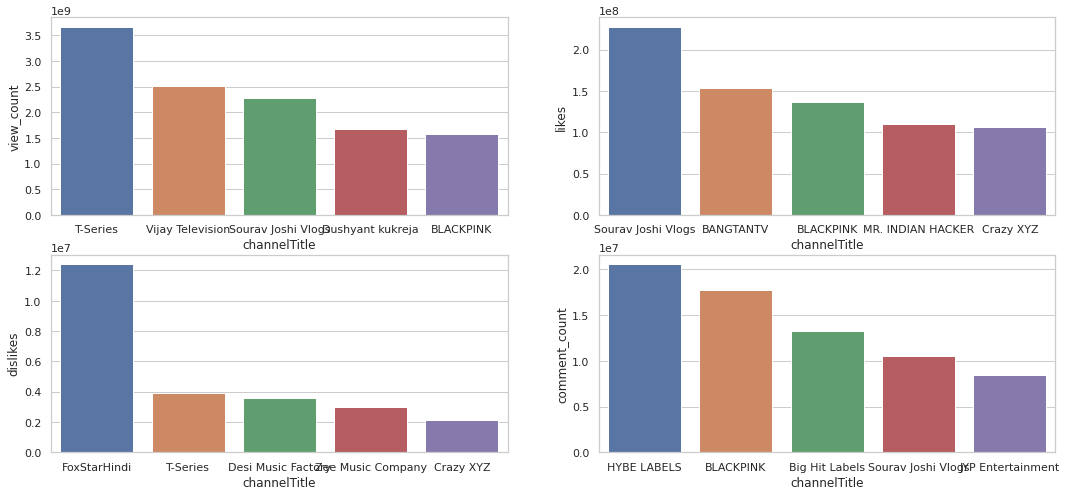

In [ ]:
#Plotting the 5 channels with largest view count, likes, dislikes, comment_count
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = channel_group_df[var_list[i]].nlargest(5).index
    y = channel_group_df[var_list[i]].nlargest(5)
    sns.barplot(x = x,y = y)

T-series seems to be most viewed channel in India. Sourav Joshi vlogs are present in each of the top contenders of views,likes and comments.

FoxStarHindi leads the dislikes section reason being most disliked sadak 2 Movie trailer was from this channel. T-series with only being on in views not likes and comments finds itself in Disliked section.

Most of the disliked videos are coming from Entertainment type of Channels like movie production or music company channels.

BTS(Bangtan Sonyeondan - Korean Bulletproof Boy Scouts - Korean Pop Music Band) Channels are also leading in comments and likes with Korean girls channel Blackpink.

#Most Watched Category

In [ ]:
category_group_df = df.groupby(by = df['Video_Category']).sum()
category_group_df

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
Video_Category,,,,,,,
Anime/Animation,23936,3482502838,104359978,2254845,5221882,3,2
Autos & Vehicles,897,2917790934,94689221,3255250,4240977,5,5
Classics,6118,563982994,41327903,327773,1317236,2,1
Comedy,104940,35250173074,1855464728,37911989,180927951,18,62
Drama,167486,20668324845,1315410304,11837539,31107139,91,192
Family,77579,9904109894,669315492,7535813,18496941,24,31
Foreign,453240,48069360287,2039481608,49099525,62906849,157,105
Horror,39475,1541970716,29470756,3153409,3034702,70,144
Music,550,421685808,20910828,427127,419151,1,2


In [ ]:
category_group_df[category_group_df['view_count'] == category_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
Video_Category,,,,,,,
Foreign,453240,48069360287,2039481608,49099525,62906849,157,105


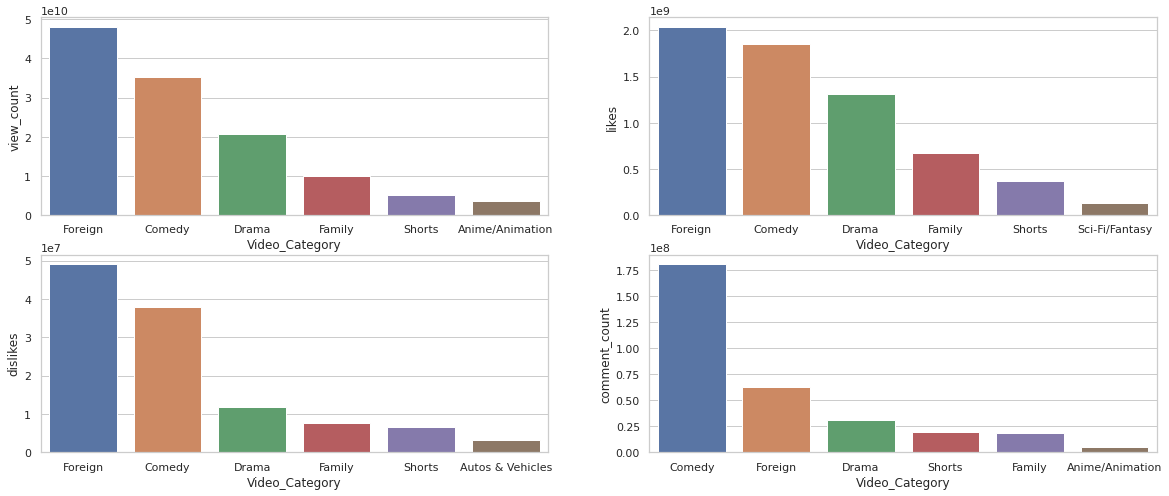

In [ ]:
#Plotting the 5 categories with largest view count, likes, dislikes, comment_count}
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = category_group_df[var_list[i]].nlargest(6).index
    y = category_group_df[var_list[i]].nlargest(6)
    sns.barplot(x = x,y = y)

#Least Watched Category

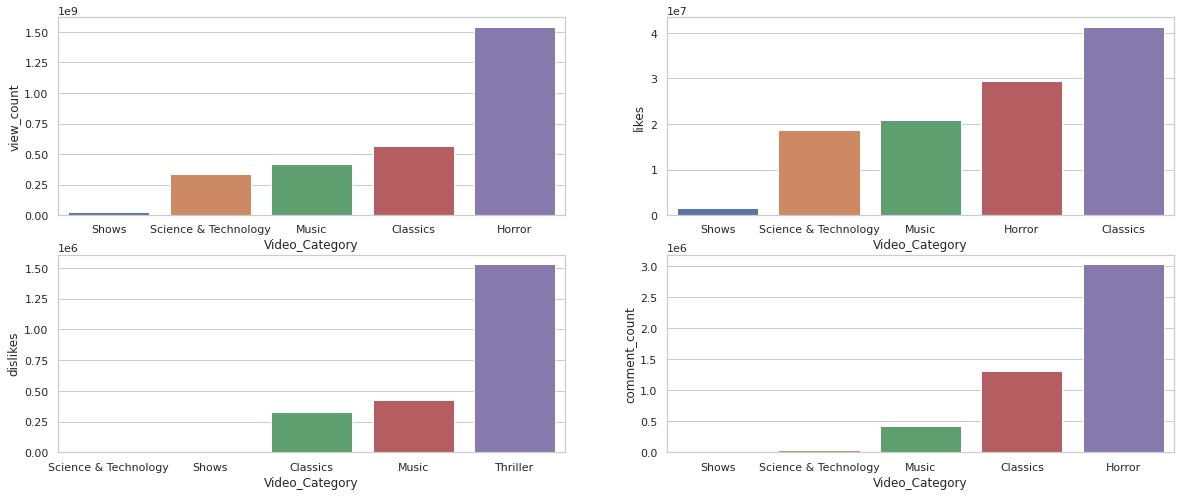

In [ ]:
#Plotting the 5 Categories with smallest view count, likes, dislikes, comment_count
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = category_group_df[var_list[i]].nsmallest(5).index
    y = category_group_df[var_list[i]].nsmallest(5)
    sns.barplot(x = x,y = y)

**Shows** are the least watched category and least like as well

##Follow up Analysis

But is that right way of analysis?

1. Dislikes would be more as there are more views. Shouldn't we consider the percentage ?
2. Does highest views say that the public are highly interested in watching those Category videos?

Let's dive deep further to understand even more



Usually, In most cases, viewers just watch the video and turn to other video without Liking/Disliking/Commenting. But if they responded to a video in like/comment/dislike then that does signifies something and we need to capture that.

Let's create a Response percentage column which signifies the public response to a video and engagement b/w viewers and the video

In [ ]:
df_Views_Analysis["Response_Percentage"] = round((( df_Views_Analysis.Likes + df_Views_Analysis.Dislikes ) /df_Views_Analysis.view_count)* 100,2)



df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage
0,Anime/Animation,3409452140,101326230,2255995,3.04
1,Autos & Vehicles,2882587134,93430979,3239950,3.35
2,Classics,557540087,40832359,321287,7.38
3,Comedy,34521044813,1822401152,36199371,5.38
4,Drama,20963188680,1330160004,11947340,6.40
5,Family,9694596165,642567874,7348410,6.70
6,Foreign,48004512563,2031051486,48974942,4.33
7,Horror,1533432090,29184442,3136659,2.11
8,Music,406558072,20035514,407200,5.03
9,Sci-Fi/Fantasy,2521392914,143084727,1975857,5.75


#Public Response vs Type of Videos

Text(0, 0.5, 'Public Response(in percentage)')

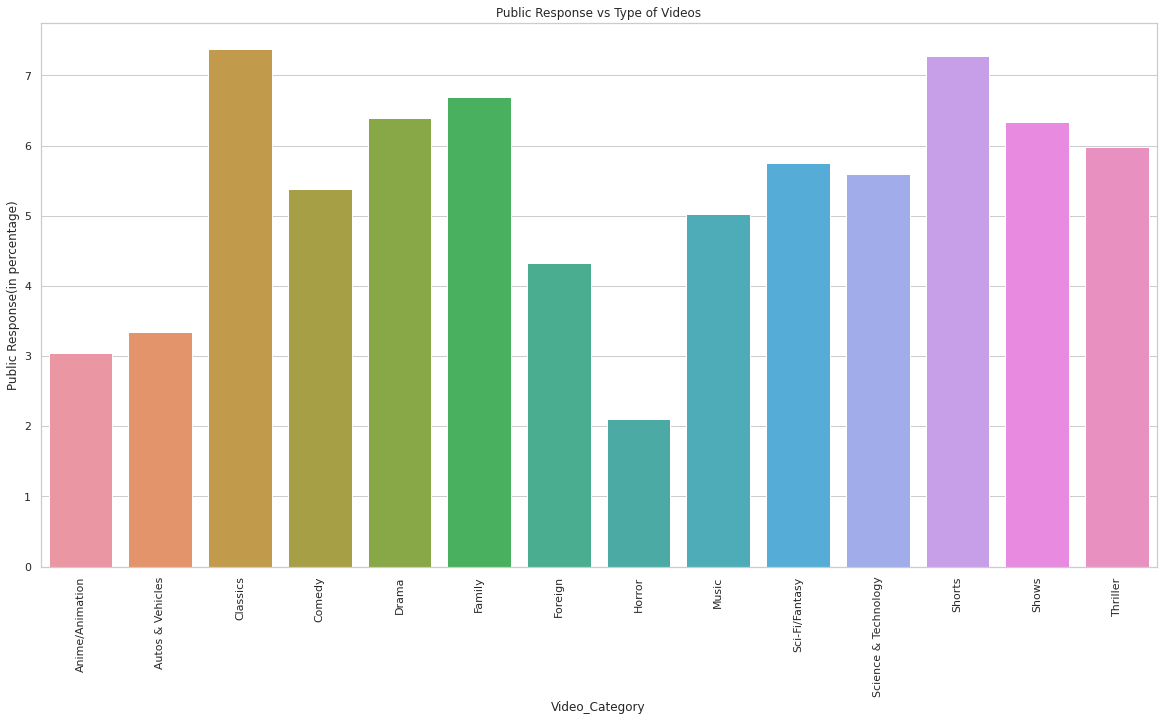

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Public Response vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.Response_Percentage)

# Add label for vertical axis
plt.ylabel("Public Response(in percentage)")

So now, We can see that Viewers are highly reacting to Classics, Drama, Family, Sports, Sci-fi/Fantacy Videos.

Let's randomly see what those videos are:

In [ ]:
df_maxViews[df_maxViews.Video_Category.isin(["Sports", "Classics"])].sample(20)


,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
15495,fmNvUVkt8cg,LUXURYബൈക്കുകളുടെ രാജാവ്‌/ Honda GoldWing Firs...,2020-10-30T04:30:01Z,Mallu Traveler,19,2020-11-01T00:00:00Z,mallu traveler|travel vlogs|mallu traveller|ke...,862031,73501,1856,6403,False,False,--------------Get Tab give Away watch this vid...,Classics
129683,4DoGacXeSY8,She Owns 10 Private Planes! #268,2022-06-10T11:00:02Z,Nas Daily,19,2022-06-17T00:00:00Z,Nas Daily|Nasmeanspeople|1minute|Travel|Nuseir...,10449458,1052894,0,7548,False,False,#shorts,Classics
142946,YAHLKSjSFAk,#miniglovevlog Day 35 “khak good morning” #lit...,2022-08-22T02:00:16Z,LittleGlove,19,2022-08-23T00:00:00Z,[None],4338739,300433,0,451,False,False,NaN,Classics
134423,_3CTgTLOOXU,School jake diya Surprise CARVAN mai 😳 bacha b...,2022-07-09T04:30:13Z,Jatt Prabhjot,19,2022-07-11T00:00:00Z,[None],719150,62659,0,759,False,False,"Gud Morning Friends, Sat Shri Akal, Namaste, B...",Classics
143372,S0uofsYzddo,#miniglovevlog Day 37 “ hum aa gaye Delhi” Del...,2022-08-24T02:00:04Z,LittleGlove,19,2022-08-25T00:00:00Z,[None],3170190,262309,0,482,False,False,NaN,Classics
102795,9NP6kgL4bsU,Swaroop's Birthday celebration | Lovely surpri...,2022-01-29T07:30:13Z,Meghana Lokesh,19,2022-02-01T00:00:00Z,Telugu Vlogs|Vlogs|Celebrity Vlogs|New year|ne...,517769,13202,0,1156,False,False,Pre-makeup skin/Every day skincare routine wit...,Classics
31187,Nc7W3d_lDtQ,We Are Pregnant !! 🤰,2021-01-22T06:30:00Z,Tech Travel Eat by Sujith Bhakthan,19,2021-01-27T00:00:00Z,tech travel eat|sujith bhakthan|malayalam trav...,855259,64300,1128,10805,False,False,ഞങ്ങളുടെ ആ സന്തോഷ വാർത്ത ഗുരുവായൂരപ്പന്റെ നടയി...,Classics
73648,C7AdkPcuxhE,Question & Answer || Sahithi || Vinni || Sekha...,2021-09-01T11:45:44Z,Sekhar Studio,19,2021-09-05T00:00:00Z,Question & Answer|Sahithi|Vinni|Sekhar Master|...,331528,19860,410,912,False,False,𝗕𝘂𝘆 𝗠𝗮𝗻 𝗠𝗮𝘁𝘁𝗲𝗿𝘀 𝗛𝗮𝗶𝗿 𝗚𝗿𝗼𝘄𝘁𝗵 𝗚𝘂𝗺𝗺𝗶𝗲𝘀 (𝗲𝗻𝗿𝗶𝗰𝗵𝗲𝗱 ...,Classics
130658,PQPBBSJLIzI,Most Expensive Passport In The World! #272,2022-06-20T13:21:52Z,Nas Daily,19,2022-06-22T00:00:00Z,Nas Daily|Nasmeanspeople|1minute|Travel|Nuseir...,1477236,152107,0,1205,False,False,#shorts,Classics
139986,5TmMERKm0NI,ദൈവമേ... 100 കിലോ ആകുന്ന മീനോ?? | Bought Giant...,2022-08-05T11:30:03Z,Fishing Freaks,19,2022-08-08T00:00:00Z,kerala|fishing|traditional|kerala fishing|snak...,853227,62400,0,880,False,False,Visit our website:https://fishingfreaks.inClic...,Classics


Let's create Similar Percentages and see what they infer

In [ ]:
df_Views_Analysis["LikesPercentage"] = df_Views_Analysis.Likes*100/df_Views_Analysis.view_count
df_Views_Analysis["DislikesPercentage"] = df_Views_Analysis.Dislikes*100/df_Views_Analysis.view_count
df_Views_Analysis["Comments"] = df_Comments["comment_count"]
df_Views_Analysis["CommentsPercentage"] = df_Views_Analysis.Comments*100/df_Views_Analysis.view_count
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage,LikesPercentage,DislikesPercentage,Comments,CommentsPercentage
0,Anime/Animation,3409452140,101326230,2255995,3.04,2.971921,0.066169,4980619,0.146083
1,Autos & Vehicles,2882587134,93430979,3239950,3.35,3.241220,0.112397,4177745,0.144930
2,Classics,557540087,40832359,321287,7.38,7.323663,0.057626,1194838,0.214305
3,Comedy,34521044813,1822401152,36199371,5.38,5.279102,0.104862,176845011,0.512282
4,Drama,20963188680,1330160004,11947340,6.40,6.345218,0.056992,30713548,0.146512
5,Family,9694596165,642567874,7348410,6.70,6.628104,0.075799,17219247,0.177617
6,Foreign,48004512563,2031051486,48974942,4.33,4.230960,0.102022,62034194,0.129226
7,Horror,1533432090,29184442,3136659,2.11,1.903211,0.204552,3012019,0.196423
8,Music,406558072,20035514,407200,5.03,4.928082,0.100158,415788,0.102270
9,Sci-Fi/Fantasy,2521392914,143084727,1975857,5.75,5.674829,0.078364,3398208,0.134775


<Figure size 1440x720 with 0 Axes>

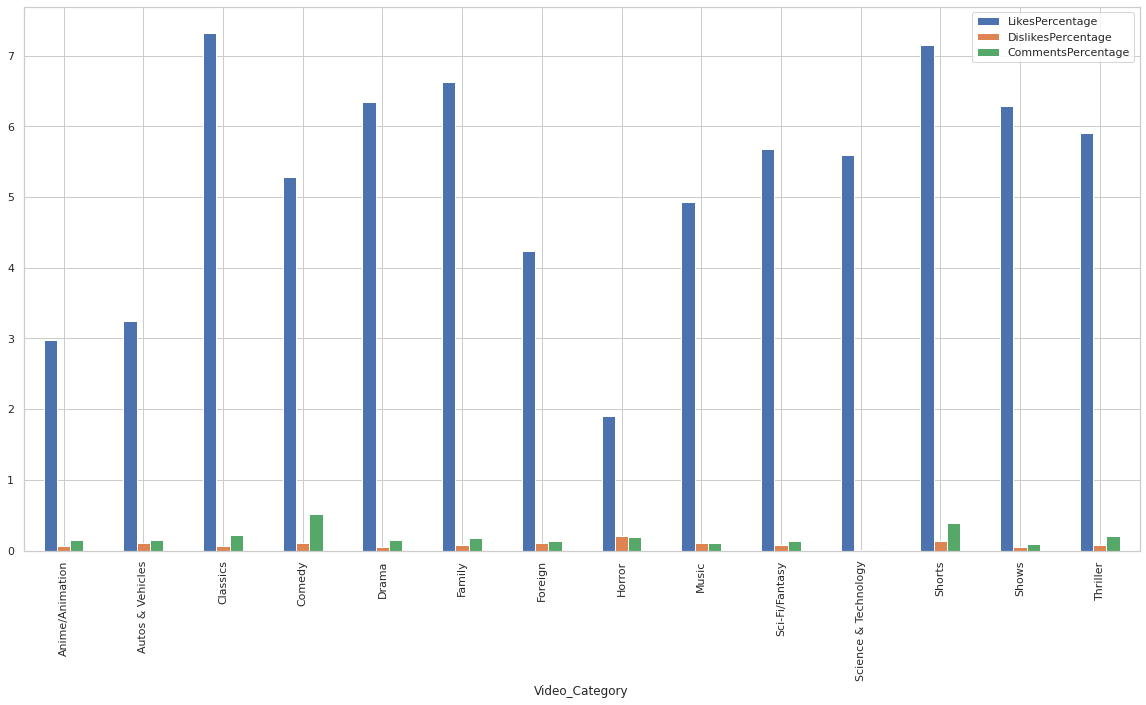

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

df_Views_Analysis.plot(x="Video_Category", y=["LikesPercentage", "DislikesPercentage", "CommentsPercentage"], kind="bar",figsize=(20,10))

#CommentsPercentage vs Type of Videos

Text(0, 0.5, 'Comments')

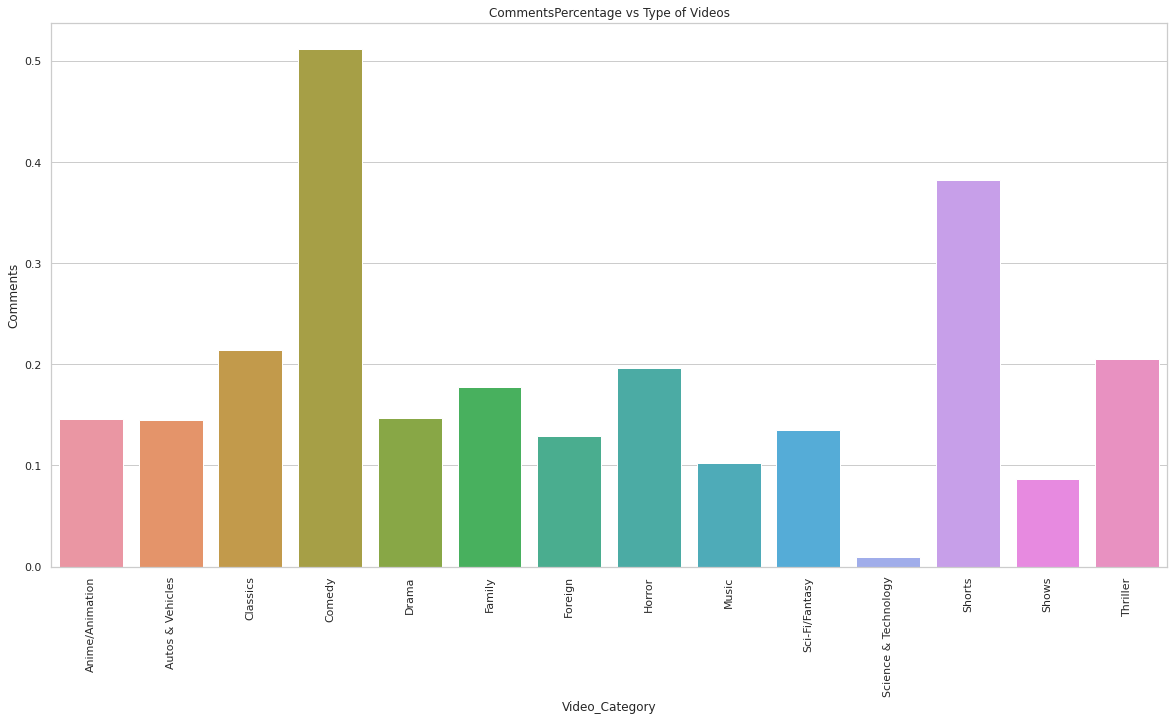

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("CommentsPercentage vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.CommentsPercentage)

# Add label for vertical axis
plt.ylabel("Comments")

Comedy and Shorts has the most comments.

Text(0, 0.5, 'Dislikes')

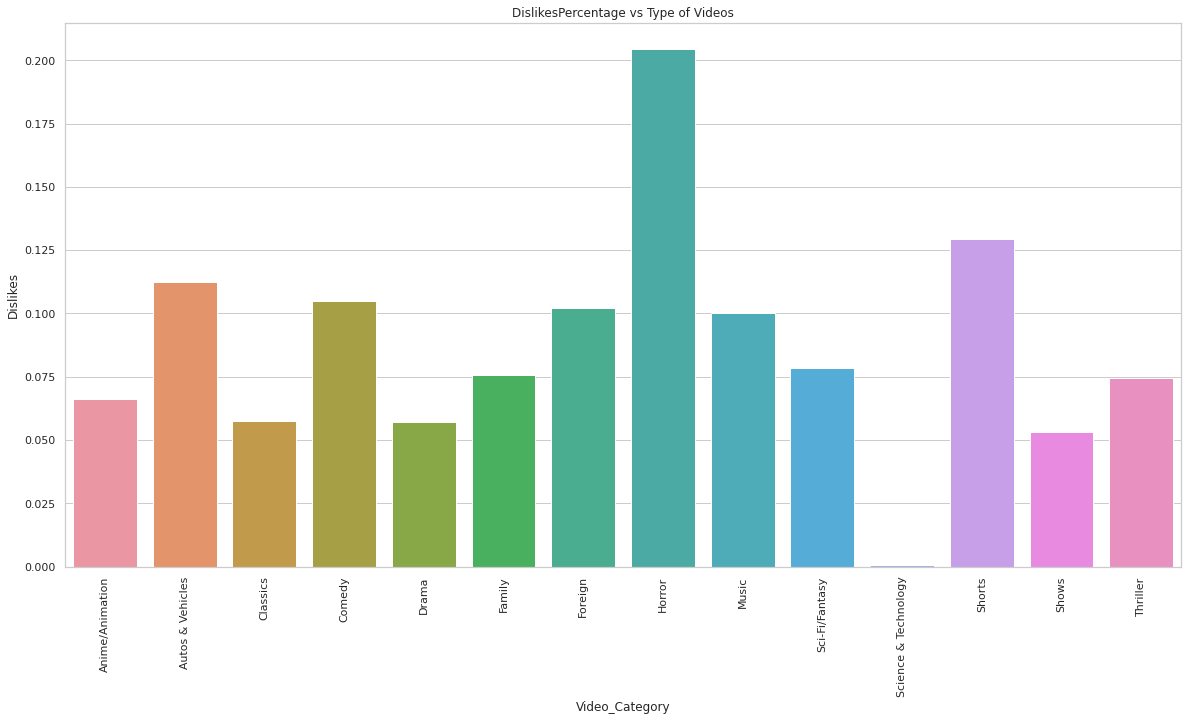

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("DislikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.DislikesPercentage)

# Add label for vertical axis
plt.ylabel("Dislikes")

**Horror** movies seems to receive the most dislikes

#LikesPercentage vs Type of Videos

Text(0, 0.5, 'Likes')

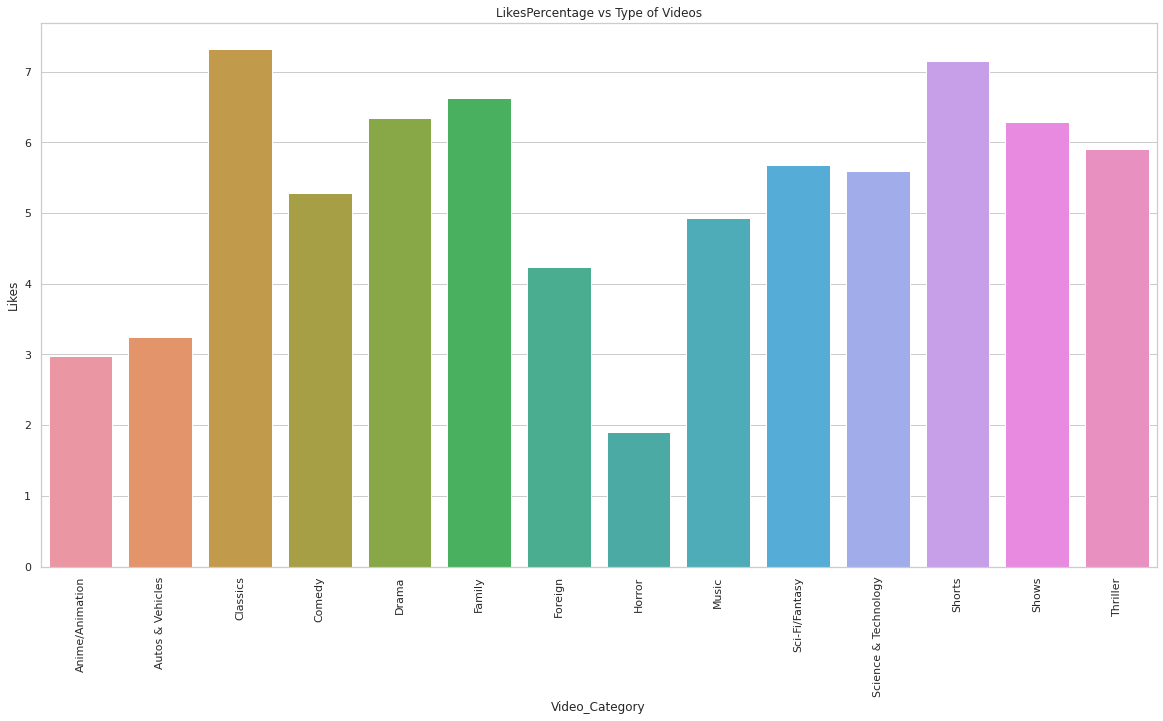

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("LikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.LikesPercentage)

# Add label for vertical axis
plt.ylabel("Likes")

**Classics, Shorts** and **Family** movies seems to receive the most likes

<br>

#Channel Analysis

In [ ]:
df_Channel = df_maxViews.groupby('channelTitle')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('channelTitle')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('channelTitle')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('channelTitle')["comment_count"].sum().reset_index()
df_Channel["Likes"] = df_Like.likes
df_Channel["Dislikes"] = df_Dislike.dislikes
df_Channel["Comments"] = df_Comments.comment_count

df_Channel.sample(10)

,channelTitle,view_count,Likes,Dislikes,Comments
3993,zulfia's recipes,1494588,40491,1863,8793
1174,Geo Entertainment,13875148,160839,7878,4845
994,FAME STUDIOZ,2423282,176338,8872,17889
948,Eat Yammiecious,3684692,32302,1151,1040
3880,iJustine,10946247,497848,12627,29008
1112,Funtastic Films,5065247,260595,9829,13234
1944,Mental gamer,23074923,2945321,0,14419
2032,Mr. & Mrs. Prince,11188521,598242,7635,56338
1588,Karuppu Roja,7427759,168718,0,6095
845,Dharma movies Creation,4227784,163652,8933,8844


In [ ]:
df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]

,channelTitle,view_count,Likes,Dislikes,Comments
3174,T-Series,3605729251,96610966,3847392,6630604
3624,Vijay Television,2546942360,54654378,909236,3134836
3027,Sourav Joshi Vlogs,2248052445,223933074,1032729,10369759
915,Dushyant kukreja,1667219165,97914610,1859647,336732
442,BLACKPINK,1583164945,136256960,1912398,17694285
2042,MrBeast,1256389734,83415829,566834,4691285
726,Crazy XYZ,1213024080,105160576,2131297,6286459
174,Ajay Sharma,1092146916,55418519,1379520,92375
3009,Sony Music India,1020569225,22149631,1065808,2987260
1260,HYBE LABELS,1016062898,102838507,531216,20575336


#Channel vs total views

Text(0, 0.5, 'Total Views')

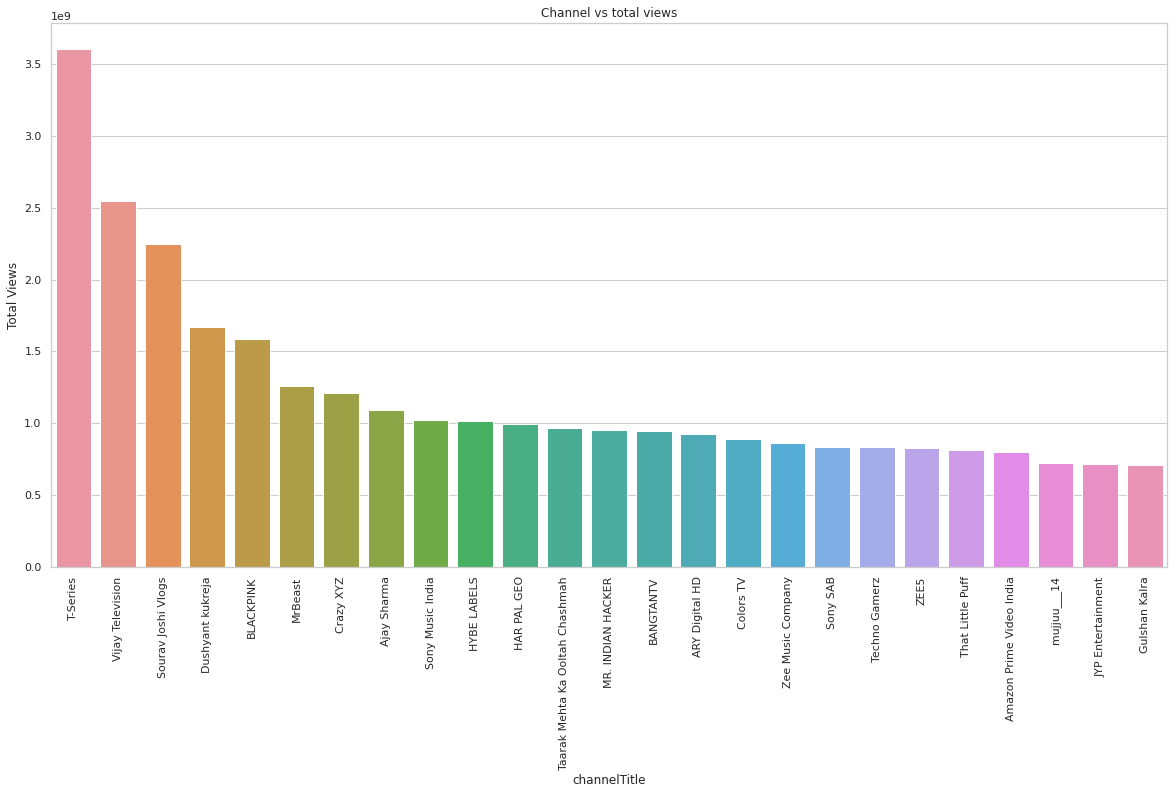

In [ ]:
Channel_Views = df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total views")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.view_count)

# Add label for vertical axis
plt.ylabel("Total Views")

#Channel vs total Likes

Text(0, 0.5, 'Total Likes')

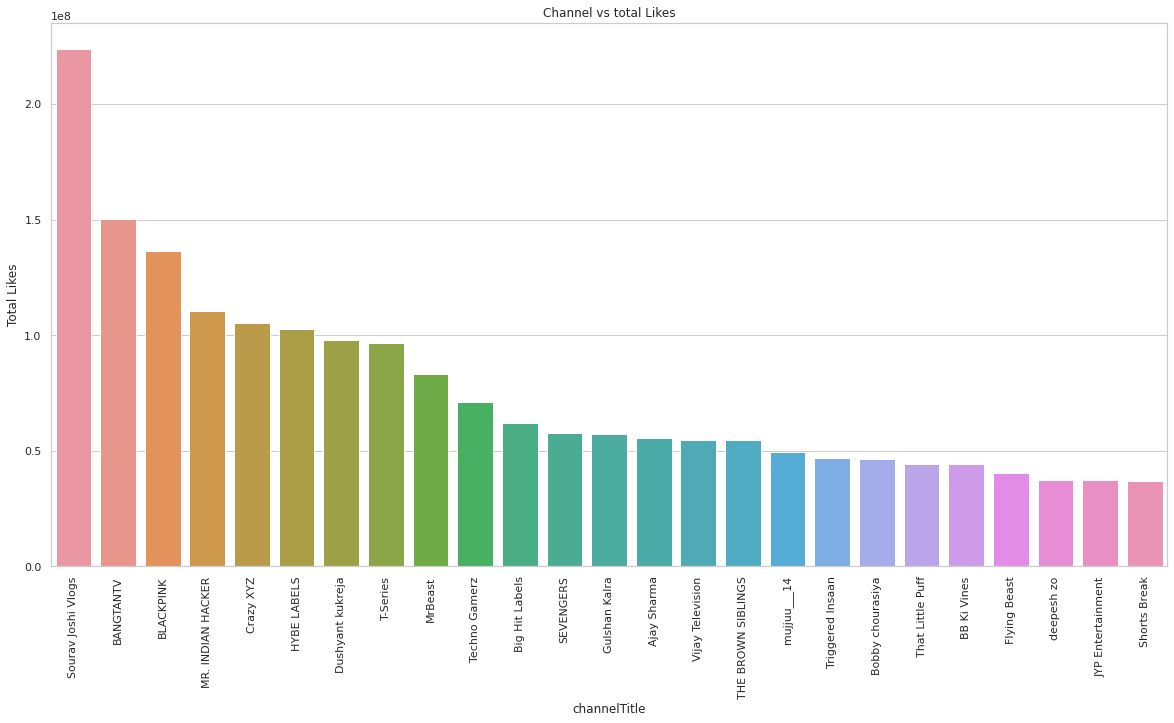

In [ ]:
Channel_Views = df_Channel.sort_values('Likes', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Likes")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Likes)

# Add label for vertical axis
plt.ylabel("Total Likes")


#Channel vs total Comments

Text(0, 0.5, 'Total Comments')

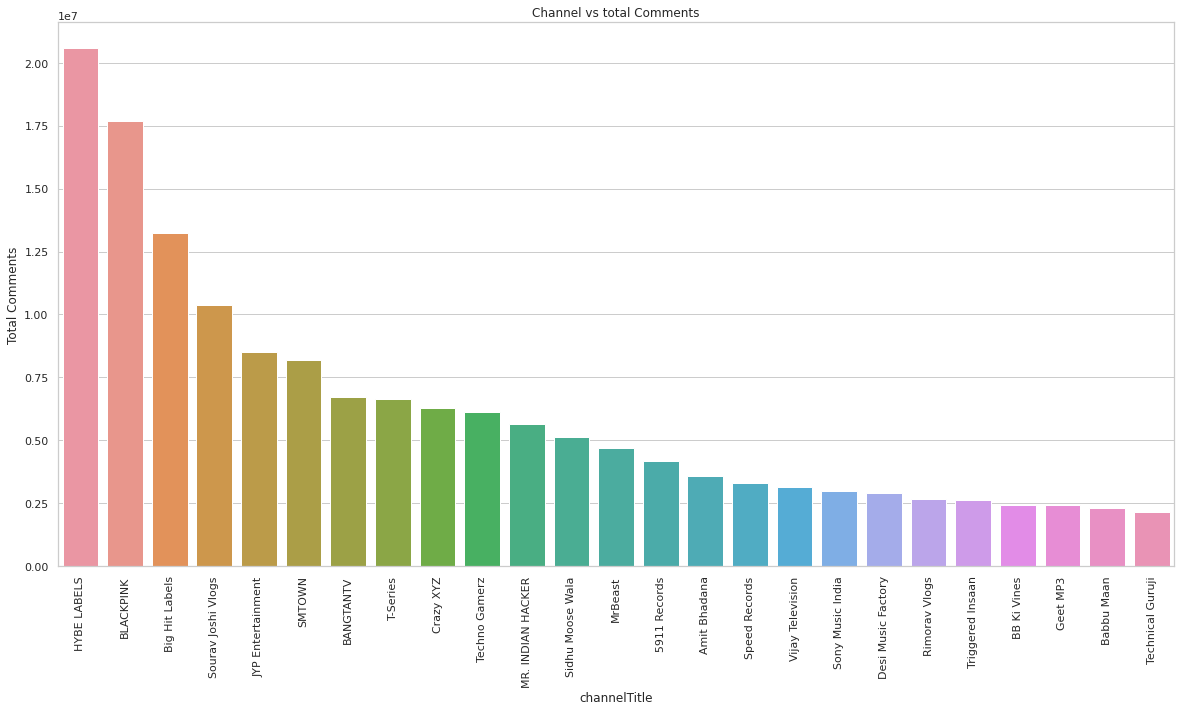

In [ ]:
Channel_Views = df_Channel.sort_values('Comments', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Comments")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Comments)

# Add label for vertical axis
plt.ylabel("Total Comments")

<br>

##Let's try some different analysis now

In [ ]:
NoOfDaysInTrending = dict(df.groupby('video_id')['view_count'].count())
NoOfDaysInTrending

In [ ]:
def fetch_video_times(value):
    return NoOfDaysInTrending[value]

Let's try to find the Channels that have their videos in trending for most of the times.

In [ ]:
df_maxViews["times_in_trending"] = df_maxViews.video_id.apply(fetch_video_times)
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,times_in_trending
61248,HzTt6OetoiU,Nayantara - Full Episode | 27 June 2021 | Sun ...,2021-06-29T06:04:50Z,Sun Bangla,24,2021-07-02T00:00:00Z,Bengali serials|Sun Bangla Serials|Sun Bangla ...,1876910,20881,1914,536,False,False,Watch the Full Episode of the bengali serial N...,Foreign,3
133856,9IM4BEzVqhM,Aap maa ya papa kiske child ho .. Aadya is mam...,2022-07-04T13:58:52Z,LittleGlove,24,2022-07-08T00:00:00Z,[None],5074333,167293,0,245,False,False,NaN,Foreign,2
87379,T3GyQ0FjnX0,Ripper Uppu Comedy,2021-11-10T08:30:02Z,Uppu,24,2021-11-13T00:00:00Z,Ripper Uppu Comedy|Ripper Karikku Comedy|Rippe...,147557,8555,216,802,False,False,#MalayalamWebSeries #Ripper #comedywebseries T...,Foreign,3
121817,HIe5xwgeUnk,വിശ്വാസം അത് അവന്റേത് മാത്രം.. വിശപ്പിന് ജാത...,2022-05-01T12:00:07Z,Vishnu Porkulam,24,2022-05-08T00:00:00Z,[None],2428297,298595,0,793,False,False,NaN,Foreign,7
141717,USTefgQC_WA,भलाई का जमाना नही😂😂 #shorts #comedy #funny #mo...,2022-08-16T01:30:04Z,Ashutosh pal,24,2022-08-17T00:00:00Z,भलाई का जमाना नही😂😂 #shorts #comedy #funny #mo...,259833,8609,0,9,False,False,भलाई का जमाना नही😂😂 #shorts #comedy #funny #mo...,Foreign,2


Top 25 Videos that are in trending for many days

In [ ]:
df_trend_video_tt = df_maxViews.sort_values('times_in_trending', ascending=False).iloc[:25,:]
df_trend_video_tt

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,times_in_trending
58680,y_RHQ4mBDKA,"Bedardi Se Pyaar Ka Song|Jubin N,Meet B,Manoj ...",2021-06-08T05:30:44Z,T-Series,10,2021-06-17T00:00:00Z,Bedardi Se Pyaar Ka|Bedardi Se Pyaar Ka song|B...,46351646,1585497,44771,77470,False,False,Gulshan Kumar & T-Series presents Bhushan Kuma...,Comedy,19
56632,pYDdDIdiSFY,KFC Style Crispy Chicken Fry🍗 #Jamamasjid #del...,2021-06-02T07:25:15Z,INDIA EAT MANIA,24,2021-06-12T00:00:00Z,[None],29970151,636668,43574,5711,False,False,#kfcchicken #jamamasjidchicken #chickenfry #ja...,Foreign,18
56622,KVh4KtUSW3A,"Baarish Ban Jaana (Official Video) Payal Dev, ...",2021-06-03T05:30:20Z,VYRLOriginals,10,2021-06-12T00:00:00Z,vyrl originals|vyrl original|hina khan|shaheer...,46199357,984341,33052,110202,False,False,VYRL Originals brings to you yet another monso...,Comedy,18
54983,Hjj9nrjvpZo,She thought she pranked me 😂🤷‍♂️ #shorts,2021-05-28T09:30:01Z,Suyash Vlogs,24,2021-06-07T00:00:00Z,[None],42645272,691428,60115,1764,False,False,NaN,Foreign,17
54976,LtLJRNBHOKc,Online Parent Teacher Meeting | Ashish Chanchlani,2021-05-29T08:35:32Z,ashish chanchlani vines,23,2021-06-07T00:00:00Z,ashish chanchlani|ashish chanchlani vines|ashi...,20645862,2311665,31993,110663,False,False,"Download India's simplest Bitcoin app, CoinDCX...",Family,17
56996,GbwpvjAEZv0,Great Khali's Instagram is The Funniest - Try ...,2021-06-05T07:00:02Z,Triggered Insaan,23,2021-06-13T00:00:00Z,triggered insaan|live insaan|great khali|great...,10226184,1034148,28653,61954,False,False,We Tried Not to Laugh at The Great Khali's Ins...,Family,16
58637,nFjVlf2r9_Q,Badshah - Paani Paani | Jacqueline Fernandez |...,2021-06-09T06:30:27Z,Saregama Music,10,2021-06-17T00:00:00Z,paani paani|paani paani badshah|badshah new so...,76252340,1417028,153022,86156,False,False,Badshah x Jacqueline Fernandez x Aastha Gill a...,Comedy,16
57399,oiBif8SefIg,LOCKDOWN WITH COUSIN ( Episode -2 ) || Rachit ...,2021-06-06T04:07:00Z,Rachit Rojha,24,2021-06-14T00:00:00Z,rachit rojha|rachit rojha new video|lockdown w...,7987529,243058,19726,20730,False,False,Lockdown with Cousin comedy. ( Episode - 2 )--...,Foreign,16
56254,AzOvsmpQVKM,Jubin Nautiyal : Kabira (कबीर दोहे) | Raaj Aas...,2021-06-03T03:30:35Z,T-Series,10,2021-06-11T00:00:00Z,कबीर के दोहे|सन्त कबीर|कबीरदास|poet|popular do...,18970641,1363032,21272,80926,False,False,Gulshan Kumar & T-Series presents Bhushan Kuma...,Comedy,16
55515,2OtgYcd83Qg,"Jagame Thandhiram | Trailer | Dhanush, Aishwar...",2021-06-01T04:30:00Z,Netflix India,24,2021-06-09T00:00:00Z,netflix india|netflix|netflix shows|JagameThan...,11209237,571223,11929,27549,False,False,Sara-vedi oda Suruli ready!The film tells the ...,Foreign,16


<br>

Top Channels whose video is in trending for most of the times

#Channel's Video vs no.of times in Trending

Text(0, 0.5, 'no.of trending')

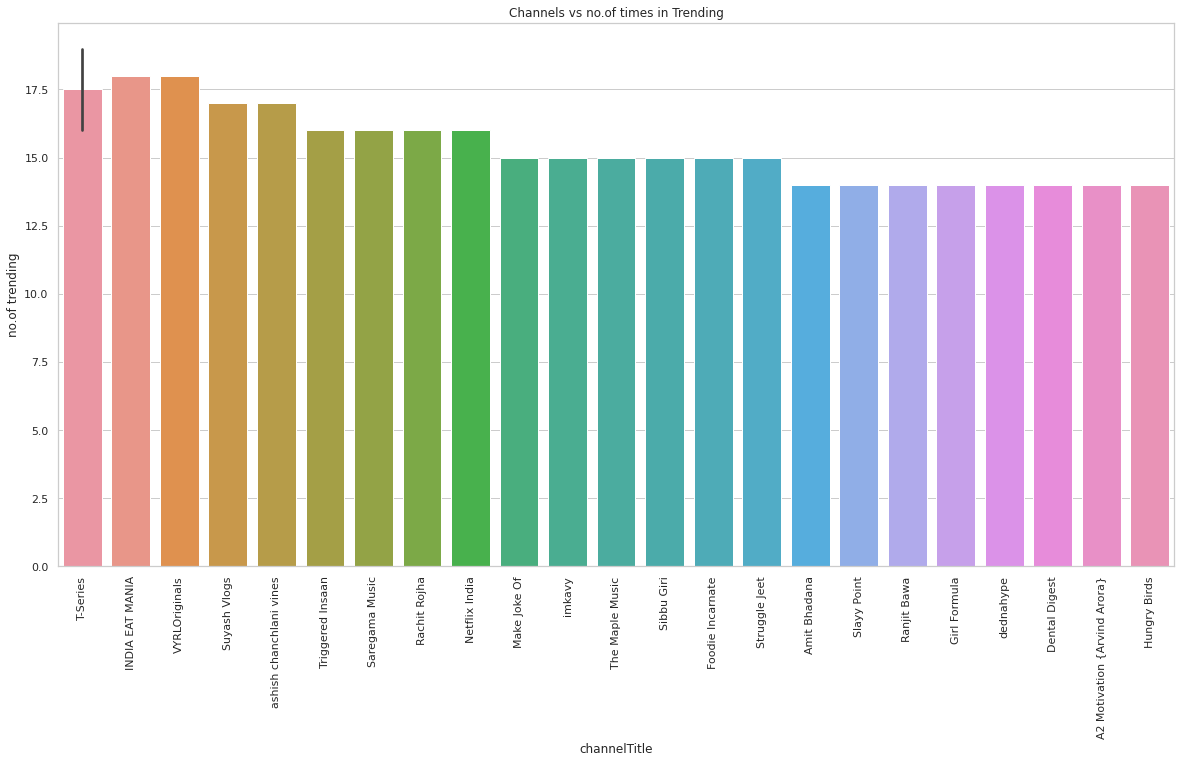

In [ ]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channels vs no.of times in Trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_trend_video_tt.channelTitle, y=df_trend_video_tt.times_in_trending)
#sns.violinplot(x = df_trend_video_tt.channelTitle, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("no.of trending")

<br>


Top 30 Channels whose Videos are in Trending

In [ ]:
df_Channel_Trending = df_maxViews.groupby("channelTitle")["times_in_trending"].sum().reset_index()
df_Channel_Trending["Majority_Videos_Category_Type"] = df_maxViews.groupby('channelTitle')['Video_Category'].agg(pd.Series.mode).reset_index()["Video_Category"]
df_Channel_Trending = df_Channel_Trending.sort_values('times_in_trending', ascending=False).iloc[:30,:]
df_Channel_Trending

,channelTitle,times_in_trending,Majority_Videos_Category_Type
3624,Vijay Television,1759,Foreign
3027,Sourav Joshi Vlogs,1203,Drama
698,Colors TV,1147,Foreign
3015,Sony SAB,1030,Foreign
3783,ZEE5,1024,Foreign
726,Crazy XYZ,963,Shorts
374,Asianet,882,Foreign
3238,Taarak Mehta Ka Ooltah Chashmah,747,Foreign
3174,T-Series,726,Comedy
697,Colors Rishtey,664,Foreign


# Channel vs total no.of times in trending

Text(0, 0.5, 'no.of times in trending')

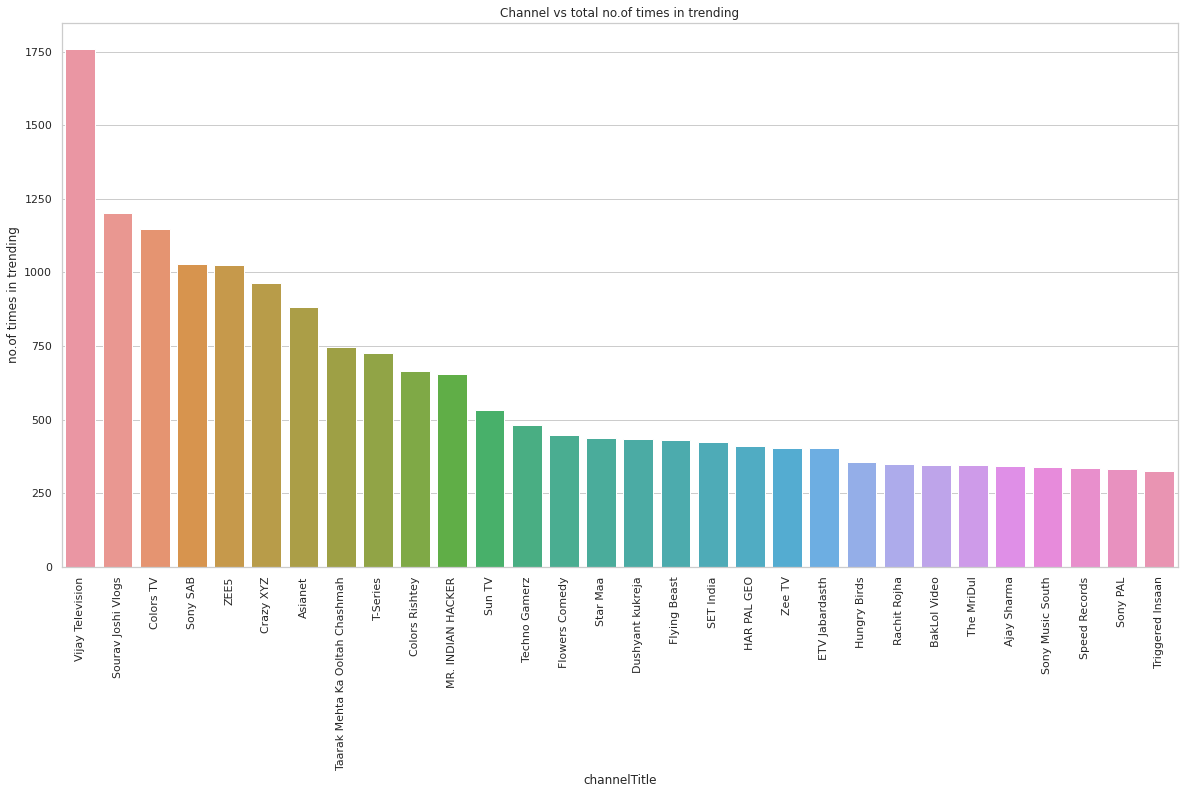

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_Channel_Trending.channelTitle, y=df_Channel_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

Category of the Videos Uploaded of Top Channels which are in Trending

#Category vs total no.of times in trending

Text(0, 0.5, 'no.of times in trending')

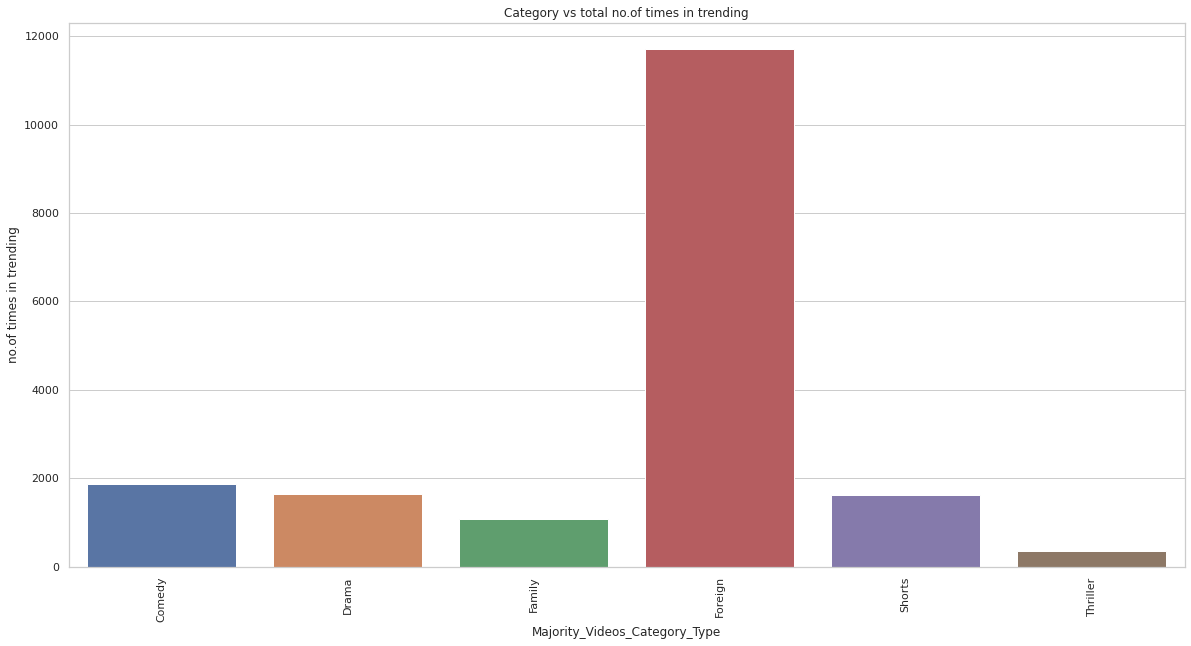

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Category vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)
Category_Trending = df_Channel_Trending.groupby("Majority_Videos_Category_Type")["times_in_trending"].sum().reset_index()
sns.barplot(x=Category_Trending.Majority_Videos_Category_Type, y=Category_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

<br>

Let's create a column which calculates no.days took for the video to be in Trending. 0 being less than 24hrs

In [ ]:
df_minViews.trending_date

47639    2021-04-27T00:00:00Z
74296    2021-09-09T00:00:00Z
98148    2022-01-09T00:00:00Z
17317    2020-11-11T00:00:00Z
2760     2020-08-26T00:00:00Z
                 ...         
60487    2021-06-29T00:00:00Z
51371    2021-05-21T00:00:00Z
27368    2021-01-08T00:00:00Z
63673    2021-07-15T00:00:00Z
55573    2021-06-09T00:00:00Z
Name: trending_date, Length: 46294, dtype: object

In [ ]:
df_minViews["JoinedTrending"] = pd.to_datetime(df_minViews.trending_date.str.split(',\s*').str[0]) #\s means matches "any whitespace character"
df_minViews["UploadedTime"] = pd.to_datetime(df_minViews.publishedAt.str.split(',\s*').str[0])
df_minViews["DaysTakenToBeOnTrending"] = (df_minViews["JoinedTrending"] - df_minViews["UploadedTime"]).dt.days
df_minViews['DaysTakenToBeOnTrending'] = df_minViews['DaysTakenToBeOnTrending'].apply(lambda x: 0 if x == -1 else x)
df_minViews.sample(10)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,JoinedTrending,UploadedTime,DaysTakenToBeOnTrending
107449,bPDYRXGmBPw,TAPATAP 1V4 CLUTCH IN TOURNAMENT | 14KILLS | BGMI,2022-02-24T14:00:16Z,JONATHAN GAMING,20,2022-02-25T00:00:00Z,jonathan|jonathan gaming|esports|BGMI|BattleGr...,796312,125273,0,1717,False,False,"If you liked the Video don’t forget to Like, S...",Comedy,2022-02-25 00:00:00+00:00,2022-02-24 14:00:16+00:00,0
136858,aiOZ0VlasX4,Main karungi kam.....😂😂 #shorts #youtubeshorts...,2022-07-23T07:23:45Z,FUNwithPRASAD,23,2022-07-24T00:00:00Z,[None],2669256,0,0,232,False,True,NaN,Family,2022-07-24 00:00:00+00:00,2022-07-23 07:23:45+00:00,0
30167,0d8z4atBMyY,ഉരുളയ്ക്ക് ഉപ്പേരി പോലെ ജയന്തിയ്ക്ക് മറുപടി കൊ...,2021-01-21T14:00:34Z,Asianet,24,2021-01-22T00:00:00Z,Santhwanam|asianet|asianet serials|malayalam s...,773147,15568,283,691,False,False,ഉരുളയ്ക്ക് ഉപ്പേരി പോലെ ജയന്തിയ്ക്ക് മറുപടി കൊ...,Foreign,2021-01-22 00:00:00+00:00,2021-01-21 14:00:34+00:00,0
78697,zYT5GdkM-Ts,1 October | Daily Current Affairs #668 | World...,2021-10-01T02:20:08Z,UTKARSH CLASSES JODHPUR,27,2021-10-01T00:00:00Z,october current affairs 2021|daily current aff...,579761,74712,1116,1384,False,False,DailyCurrentAffairs #CurrentAffairs2021 #Today...,Thriller,2021-10-01 00:00:00+00:00,2021-10-01 02:20:08+00:00,0
31742,BRSizSlKVFs,"Eat,Lick,Sniff,Leave Challenge | Food Challeng...",2021-01-30T07:20:52Z,Hungry Birds,27,2021-01-31T00:00:00Z,food challenge india|hungry birds channel|hung...,2021008,79711,4351,7418,False,False,Please guys show your love and support and do ...,Thriller,2021-01-31 00:00:00+00:00,2021-01-30 07:20:52+00:00,0
16125,0emKvzXD3mU,22 22 (TEASER) Gulab Sidhu ft Sidhu Moose Wala...,2020-11-04T12:30:09Z,5911 Records,10,2020-11-05T00:00:00Z,22 22|Bai Bai|Original One|latest|punjabi|song...,1306546,168733,5853,42253,False,False,5911 Records Presents Full Video Releasing On ...,Comedy,2020-11-05 00:00:00+00:00,2020-11-04 12:30:09+00:00,0
41870,qDNssUZPZmw,Teri Aadat - Behind The Scenes ft. Siddharth N...,2021-03-26T10:30:04Z,Anushka Sen,24,2021-03-27T00:00:00Z,Anushka|Sen|followers|official|Channel|artist|...,180066,19444,498,1316,False,False,"Hey Guys,Thank You all for giving so much Love...",Foreign,2021-03-27 00:00:00+00:00,2021-03-26 10:30:04+00:00,0
26082,tCA7OdWLDLM,NEW! Ep 3068 - Jetha in Lady's Voice! | Taarak...,2020-12-29T15:45:00Z,Taarak Mehta Ka Ooltah Chashmah,24,2020-12-31T00:00:00Z,Taarak Mehta Ka Ooltah Chashmah|तारक मेहता|taa...,3827751,81191,3701,2547,False,False,Click here to Subscribe to Taarak Mehta Ka Ool...,Foreign,2020-12-31 00:00:00+00:00,2020-12-29 15:45:00+00:00,1
1720,kMR0rm46YrI,Why Prashant Bhushan Refused to Apologise to t...,2020-08-20T15:11:21Z,Akash Banerjee,25,2020-08-21T00:00:00Z,Akash Banerjee|akash|banerjee|bhakt banerjee|a...,353958,43922,1323,6273,False,False,JOIN this Channel as a DeshBhakt Member to get...,Horror,2020-08-21 00:00:00+00:00,2020-08-20 15:11:21+00:00,0
122614,YJIgPEP6bi4,Umeed nhi thi Aisa Kuchh Hoga || Birthday Vlog ||,2022-05-11T05:19:17Z,Indian youtuber deepak,26,2022-05-12T00:00:00Z,Birthday blog|Birthday vlog|Siddharth birthday...,93073,6006,0,851,False,False,Ham hai Himachal se Gmail Id -: ds348419@gmail...,Sci-Fi/Fantasy,2022-05-12 00:00:00+00:00,2022-05-11 05:19:17+00:00,0


#Average no.of days took to be in trending

Text(0, 0.5, 'Avg no.of days')

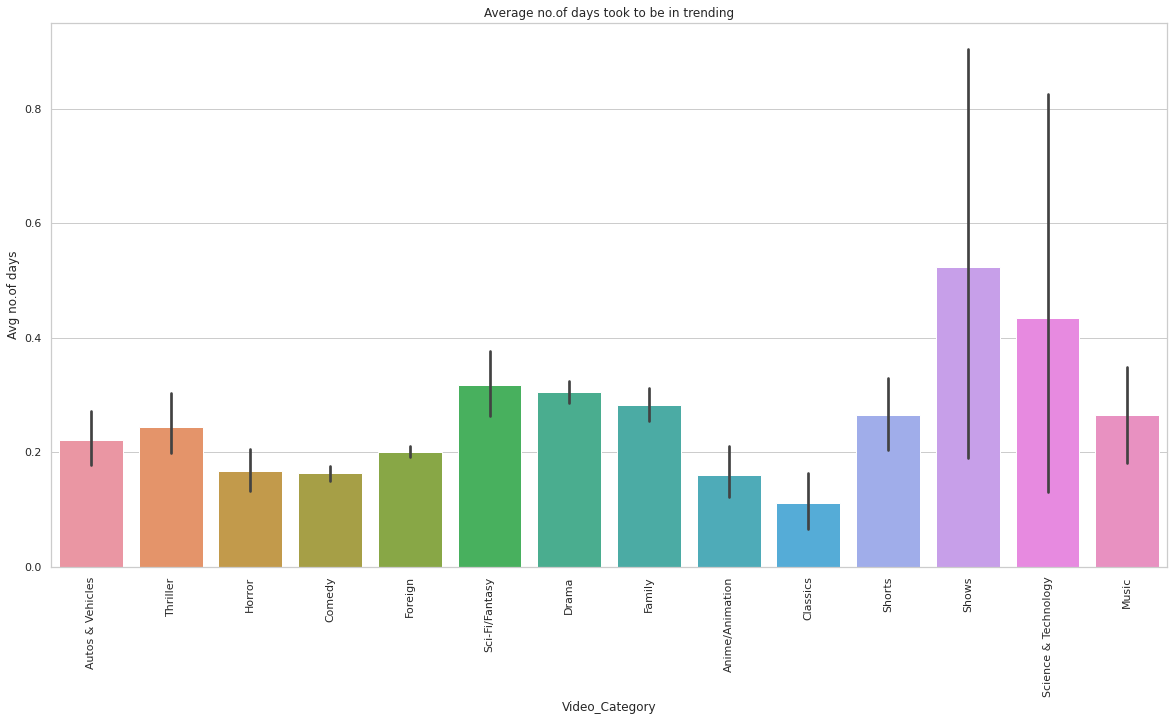

In [ ]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Average no.of days took to be in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_minViews.Video_Category, y=df_minViews['DaysTakenToBeOnTrending'])
#sns.violinplot(x = df_minViews.Video_Category, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("Avg no.of days")

In [ ]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
90,n7C3aXBzM7s,நண்பா Mahesh Babu உனக்காக இது | Vijay VS Mahes...,2020-08-11 13:20:54+00:00,Little Talks,24,2020-08-12 00:00:00+00:00,little talks|kollywood news|tamil cinema news|...,441390,19862,483,1288,False,False,#Vijay #MaheshBabu #MasterGreen India challeng...,Foreign
91,lT6HV0Iweyo,कृष्ण जन्माष्टमी विशेष कीर्तन ! समाधान महाराज ...,2020-08-11 11:30:09+00:00,Marathi Tadka,24,2020-08-12 00:00:00+00:00,Marathi Tadka|मराठी तड़का|Marathi Tadka Videos|...,60749,477,80,18,False,False,किर्तनकार : समाधान महाराज शर्मा आपल्याला हि आप...,Foreign
115,ABrm1mQXj38,IPL 2020 - Patanjali IPL As Sponsor With 10 Bi...,2020-08-10 14:15:01+00:00,MY Cricket Production,17,2020-08-12 00:00:00+00:00,IPL|ipl 2020|ipl auction 2020|my cricket produ...,84754,11941,447,1862,False,False,Watch the 31st episode of IPL Ki Baat & Cricke...,Anime/Animation
116,nhO6cINEDs4,Gaadi Parking | Mirchi Murga | RJ Naved,2020-08-10 13:57:24+00:00,Mirchi Murga,23,2020-08-12 00:00:00+00:00,rj naved Mirchi murga latest|rj naved|Mirchi M...,395007,25223,429,946,False,False,RJ Naved and RJ Sayema together in a Murga! Ca...,Family
118,aUTu0cjX4Uw,FilterCopy | When Your Younger Sister Starts D...,2020-08-08 07:00:12+00:00,FilterCopy,23,2020-08-12 00:00:00+00:00,filtercopy|filtercopy ahsaas|ahsaas channa|ahs...,1836252,91361,2883,2810,False,False,You’re dating my sister? Hold on there bro ✋🏻T...,Family
